# Data Description

The dataset that was chosen is a school performance dataset of Portuguese high school students. The data set is split into two different data sets, one for math and one for Portuguese. The data was collected using school reports and questionnaires. This data was used as a way to test if it could predict the grade of a student's performance in one of the two subjects based on their period scores, G1 and G3, and it was successful in those predictions. The data set contains many attributes that correlate to the students' background and school performance, such as health, travel time, relationship status, parent educational background, period (quarter) performance, etc. These could all lend themselves to learning more about the correlation between a student's life outside of school and how it can affect them and vice versa.



In [2]:
# Ignore warnings

import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Dataset for students in math and portuguese
student_math = pd.read_csv("student-mat.csv", sep=";")
student_portuguese = pd.read_csv("student-por.csv", sep=";")

#Merge the two datasets on the specified common columns
merge_cols = ["school", "sex", "age", "address", "famsize", "Pstatus","Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
#Dataset that merges both student math and portuguguese
#suffix displays where attributes not part of the merge came from
student_both = pd.merge(student_math, student_portuguese, on=merge_cols, suffixes=('_math', '_por'))
 
#printing the top 10 rows
display(student_math.head(5))
display(student_portuguese.head(5))
display(student_math.head(5))
display(student_both.head(5))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Histogram of Student Age Distribution

This data visualization is meant to show the way that students in the data were chosen by age to see how they were distributed. This visualization also gives the user an introduction to the data to offer an insight into the ages of the students and have some background information to help explain the data more.


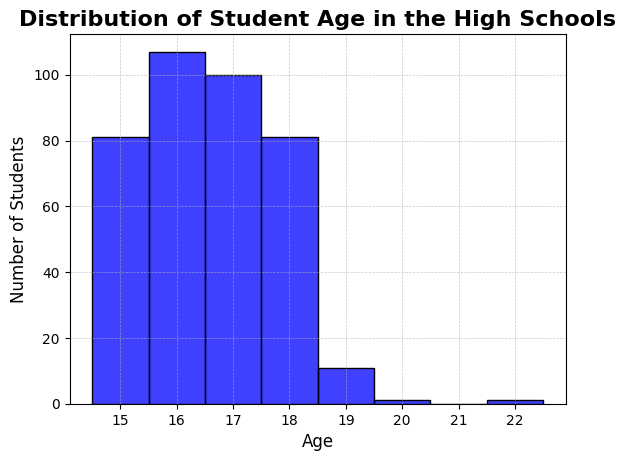

In [4]:
#Create an attribute for the total amount of absences between the 
student_both['absences_total'] = student_both['absences_math'] + student_both['absences_por']

#Create bins that align with whole ages
bins = np.arange(student_both['age'].min() - 0.5, student_both['age'].max() + 1.5, 1)

#Create the history plot
sns.histplot(student_both['age'], bins=bins, kde=False, color="Blue")

#Title and labels
plt.title("Distribution of Student Age in the High Schools", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)

plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig('VicetneGarcia_DistributionofStudentAgeintheHighSchoolsHistogramplot.png')
plt.show()


### Observation

This data shows the way that the students seem to be evenly split in terms of the way they were chosen for this data set. This reflects the way that students in Portugal for those high schools seem to have the most students around the age of 16. There is also an interesting thing to note about the student ages that seem to be outliers, like students at the ages of 19, 20, and 22, which would be an interesting aspect of data to look into as to why these students seem to have been in high school at those ages. When analyzing this graph in terms of effectiveness, ages are meant to be a categorical attribute to show the different ages of the students in the dataset. Therefore, this use of histograms and bins seems to be pretty easy to understand in terms of effectiveness. However, this graph could use a change in the color of the bins to distinguish the items further.

## Regplot of the Realtionship Between Total Absences and  Avergae Student Grades.

This data visualization displays student absences in both Math and Portuguese to explore whether there is a relationship between class attendance and average grades. It also highlights differences in student performance across the two subjects, as well as the distribution of attendance among the students.


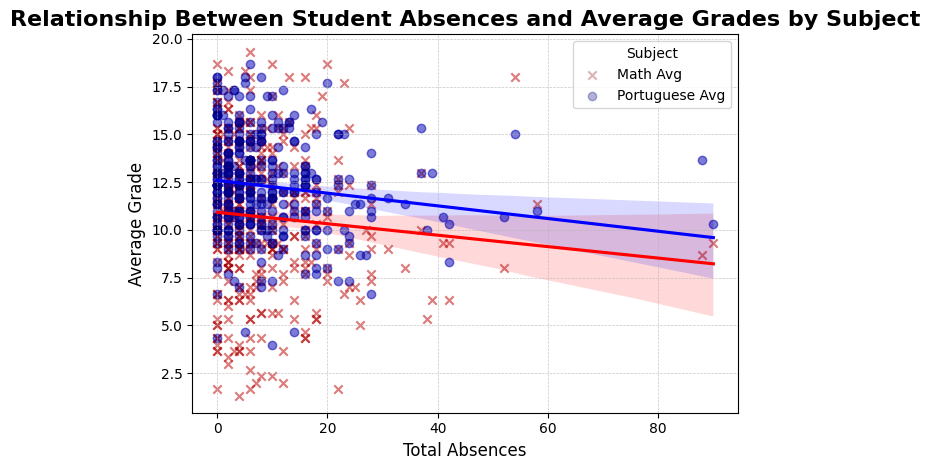

In [5]:
#health and grades
#G1&G2 AVERAGE VS G3
#Create the average colums for math and portuguese
student_both['Gavg_math'] = student_both[['G1_math', 'G2_math', 'G3_math']].mean(axis=1)
student_both['Gavg_por'] = student_both[['G1_por', 'G2_por', 'G3_por']].mean(axis=1)

#Total absences and the average grade for math  the three periods
sns.regplot(x="absences_total", y="Gavg_math", data=student_both, color='red', marker='x', scatter_kws={'alpha':0.3})#change opacity
#Total absences and the average grade for portuguese the three periods
sns.regplot(x="absences_total", y="Gavg_por", data=student_both, color='blue', scatter_kws={'alpha':0.3})

#Create a scatter plot for the legened to show up
plt.scatter(student_both['absences_total'], student_both['Gavg_math'], color='darkred', alpha=0.3, marker='x', label='Math Avg')
plt.scatter(student_both['absences_total'], student_both['Gavg_por'],color='navy', alpha=0.3, marker='o', label='Portuguese Avg')

#title and labels
plt.title("Relationship Between Student Absences and Average Grades by Subject", fontsize=16, fontweight='bold')
plt.xlabel("Total Absences", fontsize=12)
plt.ylabel("Average Grade", fontsize=12)

#Add legend
plt.legend(title="Subject")

#Add grid
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('VicetneGarcia_RelationshipBetweenStudentAbsencesandAverageGradesbySubjectRegplot.png')
plt.tight_layout()
plt.show()

### Observation

This reply seems to show that most students in high school seem to have absences below 20 days missed. This also highlights that attendance does not seem to have too much of a relationship with the average grade students get for a subject, which could also be due to there being a small minority of students that have absences that go beyond 40 days missed. This also seems to highlight that students seem to perform better when it comes to Portuguese than in math. The linear regression line does also seem to show a little bit of a relationship between absence and the final grade. However, as stated previously, there does not seem to be a strong relationship to the line's slope being very small. In terms of expressiveness, these lines seem to make use of position scaling to show the way the data is spread and also, through the use of luminance, highlight where there is a high concentration of data. When it comes to effectiveness, I tried to make it so the data points on the scatterplot were visible with the use of luminance and changing the shape of the data for both subjects.

## Boxplots of Students Final Grades Versus The Time They Spent studying

This data visualization is done to analyze the way people's effectiveness is the most common way to perform well in school, which is through studying. The data is separated through the use of a numeric survey question where the students were asked about the amount of time they spent studying weekly. The last grade is used because the study this data set was used for is said to increase the correlation between the students' final grade period and their past two grade periods. 

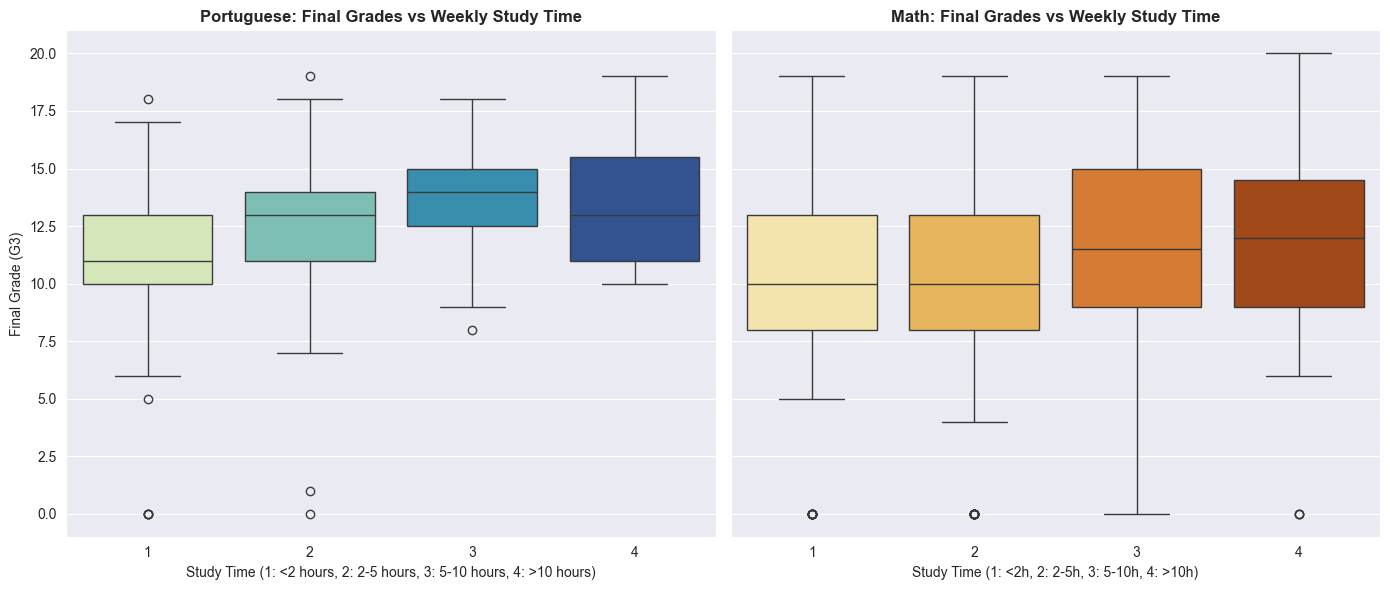

In [6]:
sns.set_style('darkgrid')

#Create 2 figures side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Portuguese Boxplot
sns.boxplot(x='studytime_por', y='G3_por', data=student_both, palette='YlGnBu', ax=axes[0])
axes[0].set_title("Portuguese: Final Grades vs Weekly Study Time", fontweight='bold')
axes[0].set_xlabel("Study Time (1: <2 hours, 2: 2-5 hours, 3: 5-10 hours, 4: >10 hours)")
axes[0].set_ylabel("Final Grade (G3)") #Due to this refeclting on both grades as shown in the study

#Math Boxplot
sns.boxplot(x='studytime_math', y='G3_math', data=student_both, palette='YlOrBr', ax=axes[1])
axes[1].set_title("Math: Final Grades vs Weekly Study Time", fontweight='bold')
axes[1].set_xlabel("Study Time (1: <2h, 2: 2-5h, 3: 5-10h, 4: >10h)")
axes[1].set_ylabel("") 

plt.savefig('VicetneGarcia_Portuguese&MathFinalGradesVsWeeklyStudyTimeBoxplot.png')
plt.tight_layout()
plt.show()

### Observation

These two box plots highlight the difference in the effect of studying for the two different subjects, where it seems that math has a higher range of students' grades for the four different times spent studying compared to the students in Portuguese, who seem to have a smaller range in grading. Which also highlights that the students that spend more time studying for math seem to not be effective due to this wider range of numbers. It is also interesting to point out how, in Portuguese, students that study longer are more likely to have a better performance for their final grade. In terms of experience, these boxplots with different hues of color were used to distinguish the different categories in the data, and also a change in color plate was used to further distinguish the data. For the effectiveness of this data set, a box plot scale was used to show the different scales of the different grades, and the plots were also side by side to compare both subjects.

## Barplot of Workday Alcohol Consumption and Total Absences

This data visualization is an aspect of the data I think was not intended to be analyzed. However, it would be interesting to see if there is some sort of correlation between the amount of alcohol students consume during the weekdays, which is when school attendance is required, and their absences. This data visualization is done to show how a student's lifestyle outside of school can affect them and see the damage that alcohol consumption can have on students' attendance.

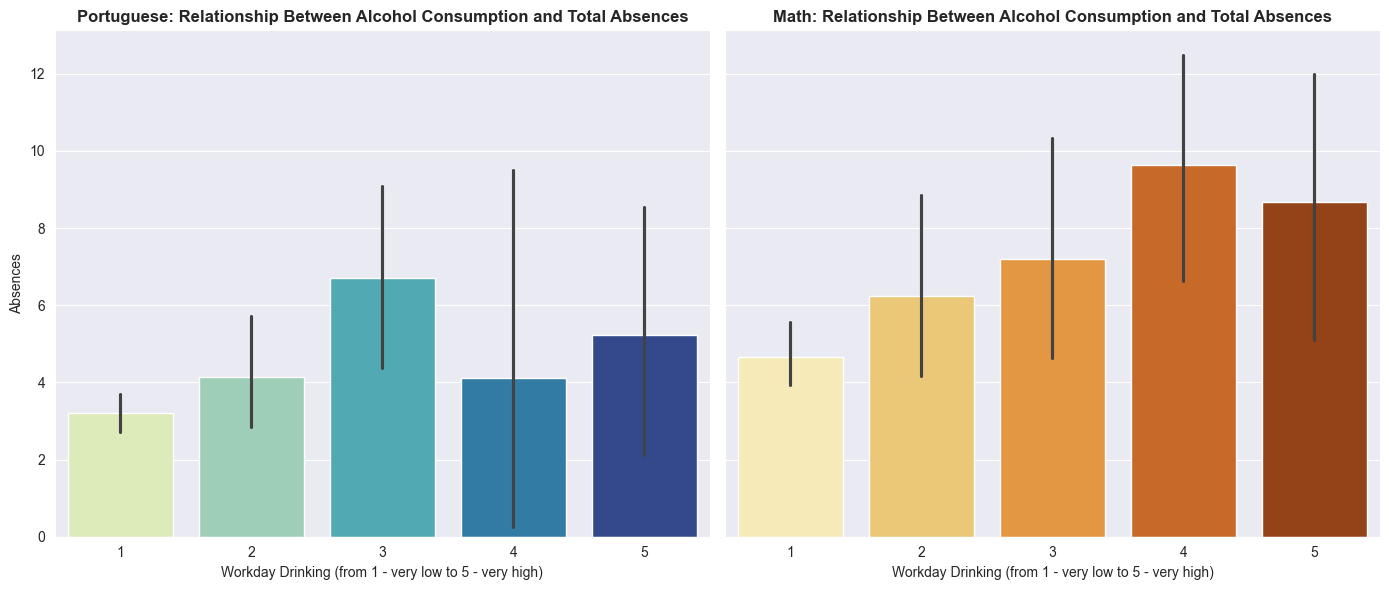

In [7]:
#Create 2 figures side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Portuguese Barplot
sns.barplot(x="Dalc_por", y="absences_por", data=student_both, palette='YlGnBu', ax=axes[0])
axes[0].set_title("Portuguese: Relationship Between Alcohol Consumption and Total Absences", fontweight='bold')
axes[0].set_xlabel("Workday Drinking (from 1 - very low to 5 - very high)")
axes[0].set_ylabel("Absences") #Due to this refeclting on both grades as shown in the study

#Math Barplot
sns.barplot(x="Dalc_math", y="absences_math", data=student_both,  palette='YlOrBr', ax=axes[1])
axes[1].set_title("Math: Relationship Between Alcohol Consumption and Total Absences", fontweight='bold')
axes[1].set_xlabel("Workday Drinking (from 1 - very low to 5 - very high)")
axes[1].set_ylabel("") 

plt.savefig('VicetneGarcia_Portuguese&MathRelationshipBetweenAlcoholConsumptionandTotalAbsencesBarplot.png')
plt.tight_layout()
plt.show()

### Observation

These bar plots seem to show that students overall seem to mostly have a very high tendency to be absent from class if they have a very high workday drinking habit. In the two graphs, as you can see, there seem to be more students that are absent from the math subject of high school, which could also be due to other factors, as we have seen before, that students seem to struggle more with math overall. It is also interesting to note how high the confidence interval that is shown for the Portuguese students is the whole bar, showing that the range for those students is between the whole range of bars, which is a weird statistic to note in the data. In terms of experience, the bar plot was used to highlight the ways that each of the different amounts of drinking that the students do compare to one another, making it easier to see their differences within each subject and with each other, and the line of confidence interval is used to highlight the average amount that the students miss for the range. For effectiveness, the same color story as the previous bar graph was used to keep some continuity for the user, making it easier to distinguish between subjects.

## Violin Plot for The Distribution of Average Grade by Paid Extra Classes

This visualization was used to see if there are any other aspects that are directly related to one another, like paying for extra classes to do better in school. This is also further investigating what could be an effective way to improve a student's grades. The two different subjects are also visualized to see what subject seems to be the most effective when it comes to students having paid extra classes. This will also highlight the number of students that pay for extra classes, which shows the way that students are financially supported in their education.

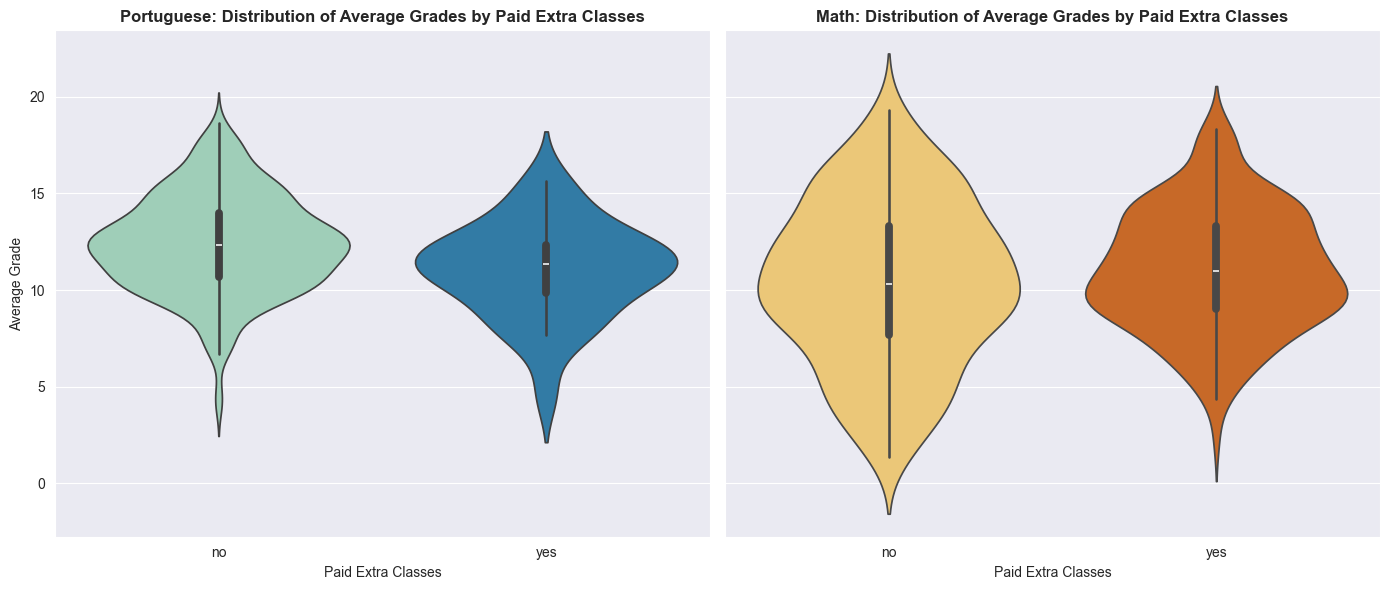

In [8]:
#Create 2 figures side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Portuguese violin plot
sns.violinplot(x='paid_por', y='Gavg_por', data=student_both, palette='YlGnBu', ax=axes[0])
axes[0].set_title("Portuguese: Distribution of Average Grades by Paid Extra Classes", fontweight='bold')
axes[0].set_xlabel("Paid Extra Classes")
axes[0].set_ylabel("Average Grade") #Due to this refeclting on both grades as shown in the study

#Math violin plot
sns.violinplot(x='paid_math', y='Gavg_math', data=student_both, palette='YlOrBr', ax=axes[1])
axes[1].set_title("Math: Distribution of Average Grades by Paid Extra Classes", fontweight='bold')
axes[1].set_xlabel("Paid Extra Classes")
axes[1].set_ylabel("") 

plt.savefig('VicetneGarcia_Portuguese&MathDistributionofAverageGradesbyPaidExtraClassesViolinplot.png')
plt.tight_layout()
plt.show()

### Observation

For this visualization, it does seem to show that there is not much of a difference in the way students perform if they do take extra paid classes. However, it is interesting to note that Portuguese students that do not pay for extra classes seem to perform better than students who do, which could be due to the students that do pay for extra classes already struggling with the subject. Also, the students who do not pay for extra classes do seem to perform better overall, because there are not that many students on the lower end for the no students, and there is a yes. Also, when it comes to math, it seems that students seem to perform more evenly spread as opposed to which could be a sign of more students paying for extra classes in math, which does seem to be an area of struggle for these students.  Also, the students of math who do not seem to pay for extra classes seem to have the more spread-out scores, which can be noted with just how big the no-violin plot is. When it comes to expressiveness, two violin plots were used to highlight the different subjects and also the size of each response to each subject for both students, which helps the user see the scale of distribution of grades due to whether they pay for extra classes. When it comes to effectiveness, it chose the same color story to distinguish the subjects and decided on using a violin plot to light the two subjects and display the data in a different format to keep the visualizations simple and engaging.